# importing the neccesary tools we would use in this project


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Load and view our training datasets

In [17]:
titanic_df = pd.read_csv('./Desktop/sklearn/Titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# Checking the number of empty fields in the training datasets(We have to fill Age and Cabin columns)
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# The data type in each column
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
# The length of training datasets
len(titanic_df)

891


# Data Visualization

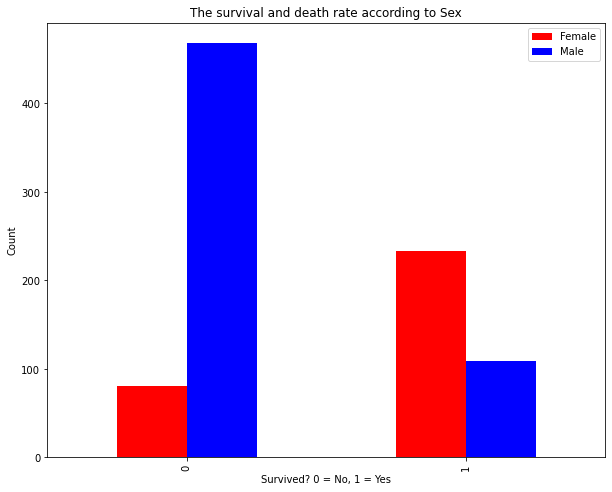

In [38]:
# The survival and death rate according to Sex
pd.crosstab(titanic_df['Survived'], titanic_df['Sex']).plot.bar(color = ['Red','Blue'], figsize = (10,8))
plt.xlabel('Survived? 0 = No, 1 = Yes')
plt.ylabel('Count')
plt.title('The survival and death rate according to Sex')
plt.legend(['Female','Male']);


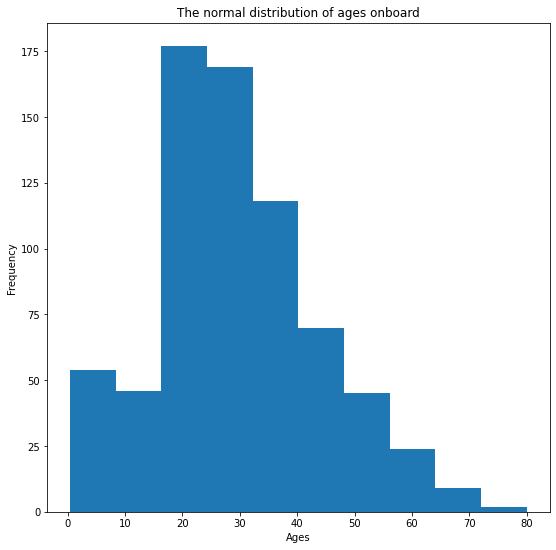

In [50]:
# The normal distribution of ages onboard
fig,ax = plt.subplots(figsize= (9,9))
ax.hist(titanic_df['Age'])
plt.xlabel('Ages')
plt.ylabel('Frequency');
plt.title('The normal distribution of ages onboard');

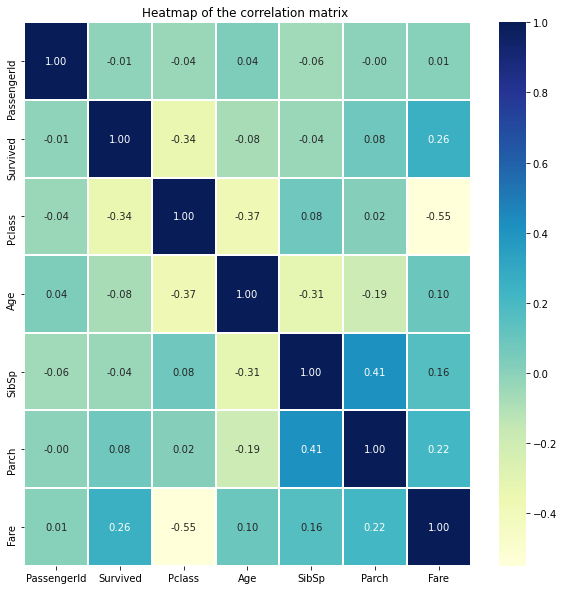

In [58]:
# Heatmap of the correlation matrix 
corr_matrix = titanic_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=1,
                 fmt=".2f",
                 cmap="YlGnBu");
plt.title('Heatmap of the correlation matrix ');

# Data Manipulation

In [60]:
# Printing the string column labels to manipulate it by converting it to categorical numbers
for label,content in titanic_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [61]:
# Convert strings into categorical numbers
for label,content in titanic_df.items():
    if pd.api.types.is_string_dtype(content):
        titanic_df[label] = content.astype('category').cat.as_ordered()

In [63]:
# Checking again if there are any strings in the datasets
for label,content in titanic_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [64]:
# Checking the number of empty fields in the training datasets(We have to fill Age and Cabin columns)
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
# Now we have to fill those NaN fileds in Age and Cabin
# fill numeric filed only with medians(more robust than the mean)
for label,content in titanic_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): # if return True excute the next line
           titanic_df[label] = content.fillna(content.median())


In [71]:
# turn categorical values into numbers (Any fileds that not numbers)
for label,content in titanic_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        titanic_df [label] = pd.Categorical(content).codes+1
# We add the +1 because pandas encodes missing categories as -1
# Now we have a ready datasets for building a machine learning model
        

In [73]:
# Awesome!! we have no NaN data 
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Machine Learning Modelling
We are going to try 3 different model and figuring out the best one
The models we are going to use are
* RandomForest
* KNeighbour
* Logistic Regression



In [168]:
# Spliting the datasets into x , y
x= titanic_df.drop('Survived', axis = 1)
y= titanic_df['Survived']

np.random.seed(49)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [169]:
# A dict with the models and their instances 
models  = {'Random Forest': RandomForestClassifier(), 'Logistic Regression': LogisticRegression(),
          'KNeighbour' : KNeighborsClassifier()}


In [170]:
# This function trying to fit and score everyone of the 3 models in one step this would save time
def model_fit_and_score (models ,x_train,x_test,y_train,y_test):
    np.random.seed(49)
    model_score = {} # setting up an empty dict
    for name , model in models.items():
        model.fit(x_train,y_train) # fit each model using for loop
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [171]:
model_fit_and_score (models ,x_train,x_test,y_train,y_test)

C:\Users\ABDELRAHMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.88268156424581,
 'Logistic Regression': 0.7597765363128491,
 'KNeighbour': 0.6424581005586593}

C:\Users\ABDELRAHMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


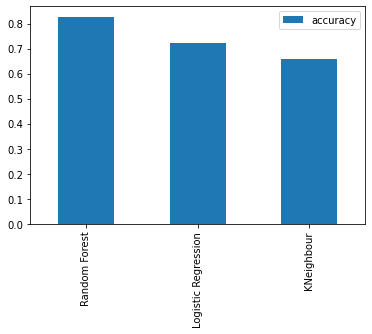

In [132]:
# Visualizing the efficincy of each model using the bar chart
model_compare = pd.DataFrame(model_fit_and_score (models ,x_train,x_test,y_train,y_test), index = ['accuracy'])
model_compare.T.plot.bar();


In [173]:
model = RandomForestClassifier() #instantiate the best model


In [175]:
np.random.seed(49) # setup random seed to stablize the performance accuracy
model.fit(x_train,y_train) # fit the model with the training dataset
model.score(x_test,y_test) # scoreing the model using test datasets (model sees this data for the first time )


0.88268156424581

# Tunning hyperparameter (improving RandomForest model)
Now we got nearly 88.2% accuracy for RandomForest model which is the best one so we gonna to proceed on this model
- what we gonna to do next is tunning hyperparameters using RanomizedsearchCV

In [202]:
# Setting up params in form of dict then use RandomizedSearchCV to fing the best params combination
set_params = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [500]} 

model = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=set_params,
                              n_iter=300,                       
                                cv= 5,
                              verbose=True)
model.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=300,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [500],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [203]:
# The best params combination
model.best_params_

{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_samples': 500,
 'max_features': 0.5,
 'max_depth': None}

In [206]:
# train the model using the best params 
model_RS = RandomForestClassifier(n_estimators = 70,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_samples= 500,
 max_features= 0.5,
 max_depth= None)
model_RS.fit(x_train,y_train)
model_RS.score(x_test,y_test)

0.8547486033519553

Even after 1500 params combinations there is no improvement in the model performance so we gonna to proceed with the default params

In [212]:
# Model Score and fit using the default params
np.random.seed(49)
ideal_model = RandomForestClassifier()
ideal_model.fit(x_train,y_train)
ideal_model.score(x_test,y_test)

0.88268156424581

# Make prediction and manipulating the test datasets

In [215]:
# importing test datasets
df_test  =pd.read_csv('./Desktop/sklearn/Titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Before use the test datasets we have to make sure that test.csv has the same format as training set (column types, no NaN fields,..)

In [220]:
# The number of each empty fields in each column
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [222]:
# type of each data in the columns
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We gonna to manipulate test datasets with the same method we had done above for training data

In [223]:
# Printing the string column labels to manipulate it by converting it to categorical numbers
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [225]:
# Convert strings into categorical numbers
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        titanic_df[label] = content.astype('category').cat.as_ordered()

In [227]:
# Checking the number of empty fields in the testing datasets(We have to fill Age and Cabin columns)
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [231]:
# Now we have to fill those NaN fileds in Age and Cabin
# fill numeric filed only with medians(more robust than the mean)
for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): # if return True excute the next line
           df_test[label] = content.fillna(content.median())


In [233]:
# turn categorical values into numbers (Any fileds that not numbers)
for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label] = pd.Categorical(content).codes+1
# We add the +1 because pandas encodes missing categories as -1

        

In [234]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [238]:
# Make our predictions 
test_preds = ideal_model.predict(df_test)

In [242]:

# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["PassengerId"] = df_test["PassengerId"]
df_preds["Survived"] = test_preds
df_preds.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [243]:
# Export to csv and save up the predictions 
df_preds.to_csv("./Desktop/sklearn/titanic github/predictions.csv", index=False)

In [245]:
df_preds.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Done :)